In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import gc

In [22]:
digits_data = pd.read_csv("data/train.csv")

In [23]:
digits_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
one = digits_data.iloc[2, 1:]
one.shape

(784,)

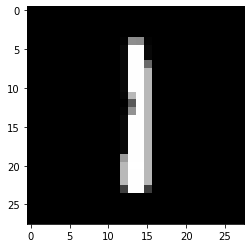

In [25]:
one = one.values.reshape(28, 28)
plt.imshow(one, cmap='gray')

In [26]:
zero = digits_data.iloc[4, 1:]
zero.shape

(784,)

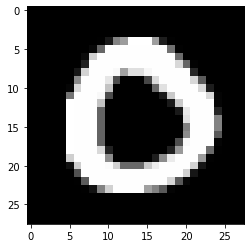

In [27]:
zero = zero.values.reshape(28, 28)
plt.imshow(zero, cmap='gray')

In [28]:
digits_data.label.astype('category').value_counts().sort_index()

0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64

In [29]:
# count of labels in the dataset
100*(round(digits_data.label.astype('category').value_counts().sort_index()/len(digits_data.index), 4))

0     9.84
1    11.15
2     9.95
3    10.36
4     9.70
5     9.04
6     9.85
7    10.48
8     9.67
9     9.97
Name: label, dtype: float64

In [30]:
#finding missing values 
digits_data.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [31]:
desc = digits_data.describe()
desc

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [32]:
X = digits_data.iloc[:, 1:]
Y = digits_data.iloc[:, 0]

# Rescaling the features
from sklearn.preprocessing import scale
X = scale(X)

# train test split with train_size=10% and test size=90%
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.10, random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4200, 784)
(37800, 784)
(4200,)
(37800,)


In [33]:
from sklearn import svm
from sklearn import metrics

# an initial SVM model with linear kernel   
linear_svm = svm.SVC(kernel='linear')

# fit
linear_svm.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [34]:
pred = linear_svm.predict(x_test)
pred[:10]

array([1, 3, 0, 0, 1, 9, 1, 5, 0, 6], dtype=int64)

In [35]:
confusion_matrix = metrics.confusion_matrix(y_true = y_test, y_pred = pred)
confusion_matrix

array([[3615,    0,   12,    8,    8,   28,   28,    5,    9,    2],
       [   0, 4089,   16,   23,    9,    3,    3,   13,   25,    4],
       [  54,   48, 3363,   64,   74,   13,   53,   52,   59,   10],
       [  20,   28,  121, 3387,    8,  175,    5,   54,   58,   44],
       [  12,   12,   26,    2, 3399,    7,   41,   41,    4,  158],
       [  49,   42,   32,  177,   41, 2899,   54,   14,   82,   28],
       [  36,   16,   55,    5,   34,   37, 3486,    3,   21,    0],
       [   9,   27,   37,   22,   70,   10,    4, 3619,   14,  142],
       [  26,   86,   71,  137,   24,  137,   29,   26, 3096,   33],
       [  38,   11,   39,   26,  182,   19,    1,  207,   27, 3228]],
      dtype=int64)

In [36]:
metrics.accuracy_score(y_true=y_test, y_pred=pred)

0.9042592592592592

In [37]:
class_wise = metrics.classification_report(y_true=y_test, y_pred=pred)
print(class_wise)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      3715
           1       0.94      0.98      0.96      4185
           2       0.89      0.89      0.89      3790
           3       0.88      0.87      0.87      3900
           4       0.88      0.92      0.90      3702
           5       0.87      0.85      0.86      3418
           6       0.94      0.94      0.94      3693
           7       0.90      0.92      0.91      3954
           8       0.91      0.84      0.88      3665
           9       0.88      0.85      0.87      3778

    accuracy                           0.90     37800
   macro avg       0.90      0.90      0.90     37800
weighted avg       0.90      0.90      0.90     37800



In [38]:
rbf_svm = svm.SVC(kernel='rbf')
rbf_svm.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [39]:
pred = rbf_svm.predict(x_test)

print(metrics.accuracy_score(y_true=y_test, y_pred=pred))

0.9250793650793651


In [40]:
from sklearn.model_selection import GridSearchCV

parameters = {'C':[1, 10, 100], 
             'gamma': [1e-2, 1e-3, 1e-4]}
 
svc_grd_srch = svm.SVC(kernel="rbf")

clf = GridSearchCV(svc_grd_srch, param_grid=parameters, scoring='accuracy')

clf.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [41]:
cv_results = pd.DataFrame(clf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,44.724267,0.719273,6.001796,0.034489,1,0.01,"{'C': 1, 'gamma': 0.01}",0.719048,0.759524,0.686905,0.733333,0.726190,0.725000,0.023450,9
1,14.355711,0.122535,3.988230,0.026789,1,0.001,"{'C': 1, 'gamma': 0.001}",0.925000,0.921429,0.908333,0.911905,0.923810,0.918095,0.006709,3
2,21.084936,0.226391,5.153801,0.043624,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.876190,0.884524,0.866667,0.873810,0.883333,0.876905,0.006547,6
3,45.258002,0.578899,6.012188,0.053131,10,0.01,"{'C': 10, 'gamma': 0.01}",0.733333,0.775000,0.709524,0.746429,0.744048,0.741667,0.021176,7
4,12.144846,0.223599,3.656180,0.038574,10,0.001,"{'C': 10, 'gamma': 0.001}",0.941667,0.927381,0.915476,0.910714,0.930952,0.925238,0.011076,1
5,9.677785,0.161740,3.408328,0.023833,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.921429,0.925000,0.900000,0.910714,0.920238,0.915476,0.009066,4
6,45.328036,0.437268,6.020198,0.014911,100,0.01,"{'C': 100, 'gamma': 0.01}",0.733333,0.775000,0.709524,0.746429,0.744048,0.741667,0.021176,7
7,12.221266,0.135052,3.674071,0.050758,100,0.001,"{'C': 100, 'gamma': 0.001}",0.938095,0.929762,0.914286,0.908333,0.929762,0.924048,0.010999,2
8,7.446123,0.077334,2.913121,0.041243,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.908333,0.920238,0.886905,0.890476,0.923810,0.905952,0.015040,5


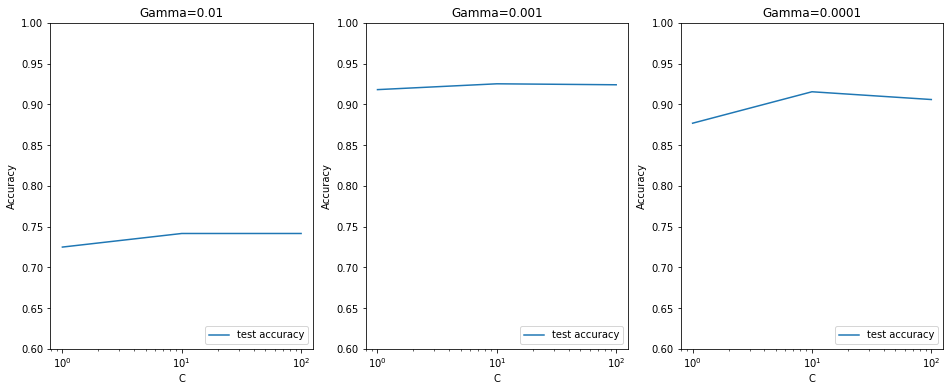

In [47]:
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])

plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])

plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])

plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

plt.show()

In [48]:
best_C_Value= 1
best_gamma_Value = 0.001
final_svm= svm.SVC(kernel='rbf', C=best_C_Value, gamma=best_gamma_Value)
final_svm.fit(x_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [49]:
preds = final_svm.predict(x_test)

In [50]:
confusion = metrics.confusion_matrix(y_true = y_test, y_pred = preds)
test_accuracy = metrics.accuracy_score(y_true=y_test, y_pred=preds)

print(test_accuracy, "\n")
print(confusion)

0.924973544973545 

[[3587    0   10   10    5   15   50   12   25    1]
 [   0 4108   14   16    5    3    6   18   10    5]
 [  24   23 3407   65   44    5   36  123   54    9]
 [   4   21   86 3502    5   89   11   73   76   33]
 [   3   11   36    7 3450   13   23   43    6  110]
 [  20   29   14  114   18 3020   79   53   36   35]
 [  31   12   11    1   14   34 3521   44   25    0]
 [   4   28   27    8   36    7    1 3739    7   97]
 [  14   59   32   80   22   97   25   44 3251   41]
 [  23   13   13   50   98    7    0  176   19 3379]]
